# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import g_key
import json
from pprint import pprint
from scipy import stats


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

count_one = 0
set_one = 1

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 of Set 1 | nagua
Processing Record 2 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 3 of Set 1 | tazovskiy
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 6 of Set 1 | saint-philippe
Processing Record 7 of Set 1 | luderitz
Processing Record 8 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | mata
Processing Record 11 of Set 1 | saint-georges
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | ostrovnoy
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ahuimanu
City not found. Skipping...
Processing Record 17 of Set 1 | saint-denis
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | bosaso
Processing Record 20 of Set 1 | mataura
Processing Record 21 of Set 1 | meulaboh
Processing Record

Processing Record 41 of Set 4 | bethel
Processing Record 42 of Set 4 | port hardy
Processing Record 43 of Set 4 | ilebo
Processing Record 44 of Set 4 | latung
Processing Record 45 of Set 4 | tambopata
Processing Record 46 of Set 4 | tasiilaq
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | tuatapere
Processing Record 49 of Set 4 | ikryanoye
Processing Record 1 of Set 5 | souillac
Processing Record 2 of Set 5 | dumaguil
Processing Record 3 of Set 5 | chlorakas
Processing Record 4 of Set 5 | san vicente
Processing Record 5 of Set 5 | dinguiraye
Processing Record 6 of Set 5 | adre
Processing Record 7 of Set 5 | vredendal
Processing Record 8 of Set 5 | coihaique
Processing Record 9 of Set 5 | mastic beach
Processing Record 10 of Set 5 | flinders
Processing Record 11 of Set 5 | taltal
Processing Record 12 of Set 5 | torbay
City not found. Skipping...
Processing Record 13 of Set 5 | chaohu
Processing Record 14 of Set 5 | norman wells
Processing Record 15 of Set 5 | krui

Processing Record 36 of Set 8 | nemuro
Processing Record 37 of Set 8 | ballina
Processing Record 38 of Set 8 | lokosovo
Processing Record 39 of Set 8 | san jose
Processing Record 40 of Set 8 | namibe
Processing Record 41 of Set 8 | powell river
Processing Record 42 of Set 8 | asosa
Processing Record 43 of Set 8 | portland
Processing Record 44 of Set 8 | kolpashevo
Processing Record 45 of Set 8 | sorland
Processing Record 46 of Set 8 | karratha
Processing Record 47 of Set 8 | derzhavinsk
Processing Record 48 of Set 8 | madimba
Processing Record 49 of Set 8 | paita
Processing Record 1 of Set 9 | panzhihua
Processing Record 2 of Set 9 | tabou
Processing Record 3 of Set 9 | ishigaki
Processing Record 4 of Set 9 | soyo
Processing Record 5 of Set 9 | iacu
Processing Record 6 of Set 9 | guaruja
Processing Record 7 of Set 9 | ilulissat
Processing Record 8 of Set 9 | riyadh
Processing Record 9 of Set 9 | jacareacanga
Processing Record 10 of Set 9 | klaksvik
Processing Record 11 of Set 9 | zaoze

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_dict = {
    "City":city_two,
    "Cloudiness":cloudinesses,
    "Country":countries,
    "Date":dates,
    "Humidity":humidities,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Wind Speed":wind_speeds
}


In [19]:
weather_dataframe = pd.DataFrame(weather_dict)
weather_dataframe.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,nagua,40,DO,1586537439,74,19.38,-69.85,30.00,2.60
1,punta arenas,57,PH,1586537395,82,8.99,125.34,23.09,2.21
2,tazovskiy,96,RU,1586537410,93,67.47,78.70,-6.44,4.43
3,hamilton,75,US,1586537439,45,39.18,-84.53,7.78,4.60
4,yellowknife,20,CA,1586537116,72,62.46,-114.35,-11.67,6.20


In [20]:
weather_dataframe.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

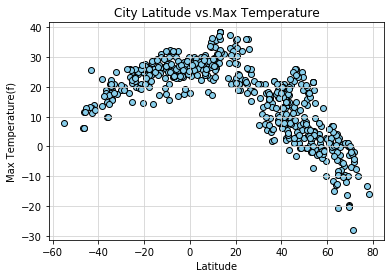

In [21]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Max Temp"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs.Max Temperature")
plt.ylabel("Max Temperature(f)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/TemperatureVsLatitude_Fig_1")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

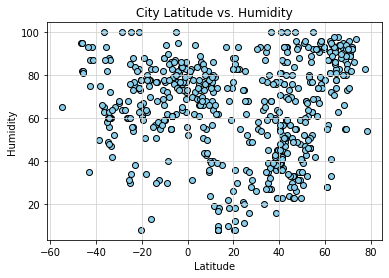

In [22]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidity"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/HumidityVsLatitude_Fig_2")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

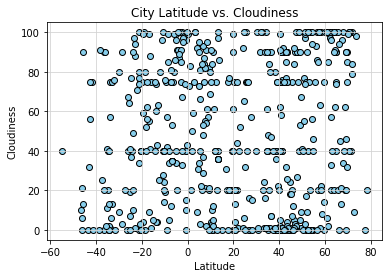

In [23]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Cloudiness"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/CloudinessVsLatitude_Fig_3")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

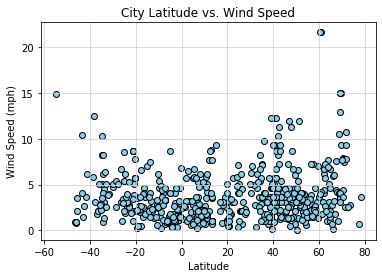

In [24]:
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind Speed"], edgecolors="black",facecolors="skyblue", marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")

# Save the figure
plt.savefig("Images/WindSpeedVsLatitude_Fig_4")

# Show plot
plt.show()

# Linear Regression

In [25]:
# OPTIONAL: Create a function to create Linear Regression plots

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) > 0, :]
southern_df = weather_dataframe.loc[pd.to_numeric(weather_dataframe["Lat"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

0      24.178968
1      29.968244
2      -2.616634
3      13.146468
4       0.174923
         ...    
545    31.054778
548     9.290665
549     4.699362
550     5.713461
553     9.106790
Name: Lat, Length: 380, dtype: float64
y = -0.56x +34.98
The r-squared is: 0.7258401913270736


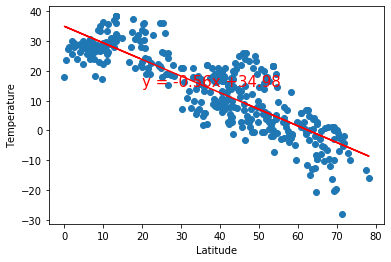

In [27]:
# Perform a linear regression on temperature vs. latitude

x_values = northern_df['Lat']
y_values = northern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

5      22.090762
6      20.531328
7      18.208391
8      17.654187
11     12.233016
         ...    
543    27.461819
546    27.169978
547    22.588956
551    24.169025
552    26.247288
Name: Lat, Length: 174, dtype: float64
y = 0.29x +28.39
The r-squared is: 0.49812617302016676


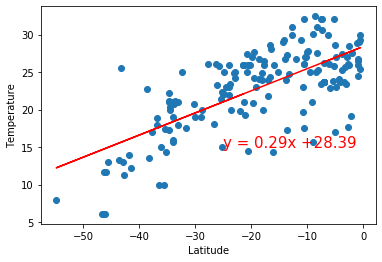

In [28]:
# Perform a linear regression on temperature vs. latitude

x_values = southern_df['Lat']
y_values = southern_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0      56.207169
1      52.815040
2      71.907600
3      62.671476
4      70.271935
         ...    
545    52.178404
548    64.930719
549    67.620916
550    67.026722
553    65.038458
Name: Lat, Length: 380, dtype: float64
y = 0.33x +49.88
The r-squared is: 0.07429467185288038


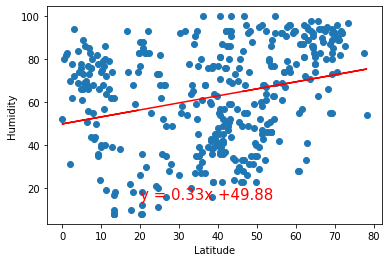

In [29]:
# Perform a linear regression on Humidity (%) vs. latitude

x_values = northern_df['Lat']
y_values = northern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

5      69.477466
6      69.427674
7      69.353504
8      69.335809
11     69.162713
         ...    
543    69.648962
546    69.639643
547    69.493373
551    69.543824
552    69.610182
Name: Lat, Length: 174, dtype: float64
y = 0.01x +69.68
The r-squared is: 5.401388647852845e-05


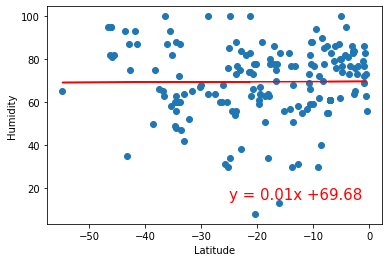

In [30]:
# Perform a linear regression on Humidity (%) vs. latitude

x_values = southern_df['Lat']
y_values = southern_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0      45.048220
1      42.944671
2      54.784477
3      49.056910
4      53.770157
         ...    
545    42.549875
548    50.457926
549    52.126189
550    51.757714
553    50.524738
Name: Lat, Length: 380, dtype: float64
y = 0.2x +41.12
The r-squared is: 0.011768759274303932


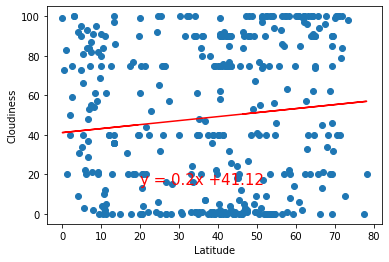

In [31]:
# Perform a linear regression on Cloudiness vs. latitude

x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

5      46.072775
6      42.042831
7      36.039815
8      34.607623
11     20.598046
         ...    
543    59.952846
546    59.198660
547    47.360224
551    51.443494
552    56.814213
Name: Lat, Length: 174, dtype: float64
y = 0.76x +62.34
The r-squared is: 0.08804815318367729


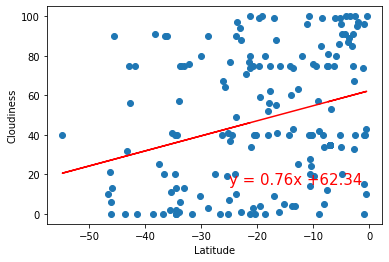

In [32]:
# Perform a linear regression on Cloudiness vs. latitude

x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0      3.244856
1      2.871012
2      4.975189
3      3.957283
4      4.794924
         ...   
545    2.800849
548    4.206272
549    4.502757
550    4.437271
553    4.218146
Name: Lat, Length: 380, dtype: float64
y = 0.04x +2.55
The r-squared is: 0.05845985470273524


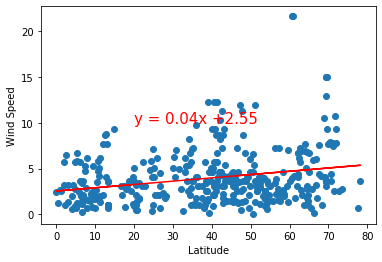

In [33]:
# Perform a linear regression on Wind Speed(mph) vs. latitude

x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

5      3.592393
6      3.877573
7      4.302378
8      4.403728
11     5.395119
         ...   
543    2.610167
546    2.663537
547    3.501287
551    3.212333
552    2.832273
Name: Lat, Length: 174, dtype: float64
y = -0.05x +2.44
The r-squared is: 0.08803912868908677


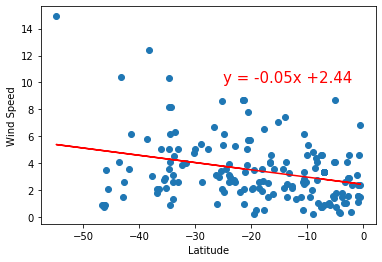

In [36]:
# Perform a linear regression on Wind Speed(mph) vs. latitude

x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")

# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

# Observations:

1.It seems that there is no correlation between humidity and latitude

2.Even though there is very little correlation between wind speed and latitude, wind speed tends to be higher near arctic and antarctic

3.As expected, temperature correlates well with the latitude. As latitude moves away from equator, temperature also decreases